# Chainer CIFAR100 
## flop_sp_efficiency profile and combined trace

## flop_sp_efficiency

Profiled on g3.4xlarge (M60), CUDA9.1
```
$ nvprof --csv --log-file cifar_M60_flops.csv --metrics flop_sp_efficiency --replay-mode application python chainer/examples/cifar/train_cifar.py -d cifar100 -g 0 -b 1024 -e 2
```

In [1]:
%matplotlib inline
import re
import numpy as np
import matplotlib
#matplotlib.use("Agg")
import matplotlib.pyplot as plt
import os.path
import datetime
from cycler import cycler
import pandas as pd

In [2]:
filename_nvprof_flops_chainer = "cifar_M60_flops.csv"

maxrows = None


In [3]:
file1 = filename_nvprof_flops_chainer
print "Reading",file1

# columns = [time_field_index, duration_field_index,size_field_index, throughput_field_index,
#            src_field_index, dst_field_index,
#            context_index, stream_index,
#            name_field_index]


Reading cifar_M60_flops.csv


In [8]:
print file1
df = pd.read_csv(file1, header = 0, skiprows=[0,1], nrows = maxrows)
print df.shape

cifar_M60_flops.csv
(50, 8)


In [34]:
df.iloc[:3]

,Device,Kernel,Invocations,Metric Name,Metric Description,Min,Max,Avg
0,Tesla M60 (0),sgemm_32x32x32_TN_vec,1.0,flop_sp_efficiency,FLOP Efficiency(Peak Single),49.374895,49.374895,49.374895
1,Tesla M60 (0),cupy_not_equal,4.0,flop_sp_efficiency,FLOP Efficiency(Peak Single),0.000000,2.079002,1.556007
2,Tesla M60 (0),void pooling_bw_kernel_max_nchw_fully_packed_s...,5.0,flop_sp_efficiency,FLOP Efficiency(Peak Single),0.003474,0.140828,0.069233


## cifar_M60_flops data invalid?

<p style="color:#ffffff;background-color:#ff0505;display:block;padding:7px;">
Number of kernel invocations, min, max and avg values differ from profiling on Mouse with 
<pre style="display:block;background-color:#eee">31Jan0840peter@mouse:~$ ./profile_cifar.sh --metrics flop_sp_efficiency,flop_dp_efficiency --csv --log-file chainer_trace_mouse_flops.csv</pre>

<a href="http://localhost:8888/notebooks/FLOPs%20profile%20Chainer%20mouse.ipynb#Review-profiling-data">Mouse profile</a>
</p>
    

In [37]:
df_sp_wide = df[df['Metric Name'] == "flop_sp_efficiency"]
df_sp_wide = df_sp_wide.drop(columns = ['Device', 'Metric Description']).fillna(0)
df_sp_wide

,Kernel,Invocations,Metric Name,Min,Max,Avg
0,sgemm_32x32x32_TN_vec,1.0,flop_sp_efficiency,49.374895,49.374895,49.374895
1,cupy_not_equal,4.0,flop_sp_efficiency,0.000000,2.079002,1.556007
2,void pooling_bw_kernel_max_nchw_fully_packed_s...,5.0,flop_sp_efficiency,0.003474,0.140828,0.069233
3,"void gen_sequenced<curandStateXORWOW, float, i...",10.0,flop_sp_efficiency,0.832893,1.692623,1.240821
4,cupy_sum,4.0,flop_sp_efficiency,0.000000,0.000000,0.000000
5,maxwell_scudnn_winograd_128x128_ldg1_ldg4_tile...,5.0,flop_sp_efficiency,0.000005,27.562481,5.543743
6,cupy_mean,5.0,flop_sp_efficiency,0.000000,2.659840,0.532913
7,maxwell_sgemm_128x64_nt,1.0,flop_sp_efficiency,74.135040,74.135040,74.135040
8,"generate_seed_pseudo(unsigned __int64, unsigne...",1.0,flop_sp_efficiency,0.000000,0.000000,0.000000
9,cupy_argmax,4.0,flop_sp_efficiency,0.000000,0.004321,0.003199


#### Parse data to float

In [10]:
pat = re.compile("[0-9\.]+")
# Extract float number from a string
def parseFloat(s):
    global pat
    if type(s) is not str:
        return s
    f = pat.search(s)
    if f is not None:
        d = float(f.group())
        return d
    return None

In [11]:
df[['Min','Max','Avg']] = df[['Min','Max','Avg']].applymap(parseFloat)

In [12]:
df.iloc[:3]

,Device,Kernel,Invocations,Metric Name,Metric Description,Min,Max,Avg
0,Tesla M60 (0),sgemm_32x32x32_TN_vec,1.0,flop_sp_efficiency,FLOP Efficiency(Peak Single),49.374895,49.374895,49.374895
1,Tesla M60 (0),cupy_not_equal,4.0,flop_sp_efficiency,FLOP Efficiency(Peak Single),0.000000,2.079002,1.556007
2,Tesla M60 (0),void pooling_bw_kernel_max_nchw_fully_packed_s...,5.0,flop_sp_efficiency,FLOP Efficiency(Peak Single),0.003474,0.140828,0.069233


### Aggregate values for min, max and avg for all kernels

#### Remove unused columns

In [26]:
df_parts = df.drop(columns = ['Device', 'Kernel', 'Invocations', 'Metric Description']).fillna(0)
print df_parts.shape
df_parts

(50, 4)


,Metric Name,Min,Max,Avg
0,flop_sp_efficiency,49.374895,49.374895,49.374895
1,flop_sp_efficiency,0.000000,2.079002,1.556007
2,flop_sp_efficiency,0.003474,0.140828,0.069233
3,flop_sp_efficiency,0.832893,1.692623,1.240821
4,flop_sp_efficiency,0.000000,0.000000,0.000000
5,flop_sp_efficiency,0.000005,27.562481,5.543743
6,flop_sp_efficiency,0.000000,2.659840,0.532913
7,flop_sp_efficiency,74.135040,74.135040,74.135040
8,flop_sp_efficiency,0.000000,0.000000,0.000000
9,flop_sp_efficiency,0.000000,0.004321,0.003199


#### Remove >100 values

"--replay-mode application" option produces invalid values for some kernels

In [28]:
df_valid = df_parts[(df_parts['Max'] <= 100) & (df_parts['Avg'] <= 100) & (df_parts['Min'] <= 100)]
print df_valid.shape
df_valid

(47, 4)


,Metric Name,Min,Max,Avg
0,flop_sp_efficiency,49.374895,49.374895,49.374895
1,flop_sp_efficiency,0.000000,2.079002,1.556007
2,flop_sp_efficiency,0.003474,0.140828,0.069233
3,flop_sp_efficiency,0.832893,1.692623,1.240821
4,flop_sp_efficiency,0.000000,0.000000,0.000000
5,flop_sp_efficiency,0.000005,27.562481,5.543743
6,flop_sp_efficiency,0.000000,2.659840,0.532913
7,flop_sp_efficiency,74.135040,74.135040,74.135040
8,flop_sp_efficiency,0.000000,0.000000,0.000000
9,flop_sp_efficiency,0.000000,0.004321,0.003199


#### Remove all-zero rows

In [15]:
def RemoveZeroData(df):
    df = df[(df['Min'] != 0) | (df['Avg'] != 0) | (df['Max'] != 0)]
    return df

In [29]:
flops_sp = RemoveZeroData(df_valid[df_valid['Metric Name'] == "flop_sp_efficiency"])
flops_dp = RemoveZeroData(df_valid[df_valid['Metric Name'] == "flop_dp_efficiency"])
flops_other = RemoveZeroData(df_valid[df_valid['Metric Name'] != "flop_sp_efficiency"])
print flops_dp.shape,":",flops_sp.shape,":",flops_other.shape

(0, 4) : (39, 4) : (0, 4)


In [30]:
flops_other

,Metric Name,Min,Max,Avg


In [31]:
flops_sp.iloc[:3]

,Metric Name,Min,Max,Avg
0,flop_sp_efficiency,49.374895,49.374895,49.374895
1,flop_sp_efficiency,0.000000,2.079002,1.556007
2,flop_sp_efficiency,0.003474,0.140828,0.069233


In [32]:
flops_dp.iloc[:3]

,Metric Name,Min,Max,Avg


### Plot distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e19a510>],
       [<matplotlib.axes._subplots.AxesSubplot object at 0x112043b90>]], dtype=object)

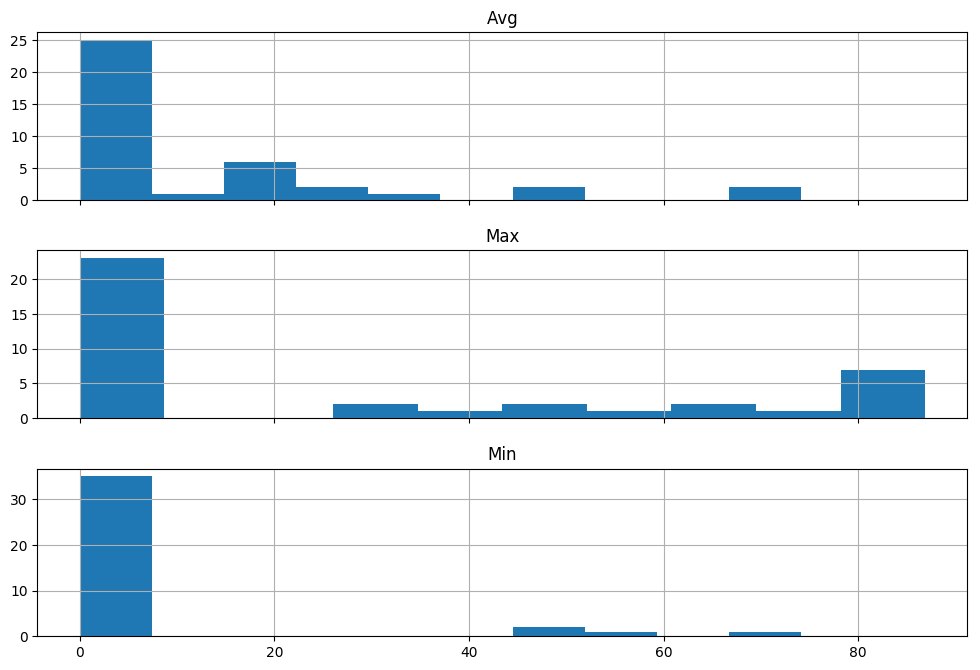

In [33]:
plt.rcParams['figure.figsize'] = 12,8
flops_sp.hist(layout=(3,1),sharex=True)

### Aggregate values for Min, Max and Avg

In [58]:
df_piv = pd.pivot_table(df_nonzero, values=['Min','Max','Avg'], index='Metric Name',
                        aggfunc={'Min':np.min, 'Max':np.max, 'Avg':np.mean})
df_piv

,Avg,Max,Min
Metric Name,,,
flop_sp_efficiency,15.927085,82.287953,0.000005


In [59]:
df_piv_mean = pd.pivot_table(df_nonzero, values=['Min','Max','Avg'], index='Metric Name',
                        aggfunc={'Min':np.mean, 'Max':np.mean, 'Avg':np.mean})
df_piv_mean

,Avg,Max,Min
Metric Name,,,
flop_sp_efficiency,15.927085,28.017125,9.972539



<div style="display:block;margin:50px;font-size:200%;line-height:200%;">
    Maximum SP efficiency for Cifar100 sample is 82%.<br>
    Average: ≈16%.
</div>

# Plot combined profiling

In [66]:
time_field_index = 0
duration_field_index = 1
SSMem_field_index = 9
DSMem_field_index = 10
size_field_index = 11
throughput_field_index = 12
src_field_index = 13
dst_field_index = 14
context_index = 16
stream_index = 17
name_field_index = 18

title_pattern = re.compile("^(Start|s).*")
cuda_pattern = re.compile("\[CUDA .*\]")

columns = [time_field_index, duration_field_index,
           size_field_index, throughput_field_index,
           src_field_index, dst_field_index,
           context_index, stream_index,
           name_field_index]

In [389]:
filename_nvsmi_chainer = "nvidia-smi-cifar_M60_combined.csv"
filename_nvprof_chainer = "nvprof-trace-cifar_m60_combined-47324.csv"

df_nvprof = pd.read_csv(filename_nvprof_chainer,header = 0, usecols = columns, skiprows=[0,1,2,4], nrows = maxrows)
df_nvprof.iloc[100:103]

,Start,Duration,Size,Throughput,SrcMemType,DstMemType,Context,Stream,Name
100,1.439406,4.620204,NaN,NaN,NaN,NaN,1,7,cupy_random_1_minus_x [1465]
101,1.444159,9.547065,NaN,NaN,NaN,NaN,1,7,dropout_fwd [1480]
102,1.453710,0.035008,NaN,NaN,NaN,NaN,1,7,"void gen_sequenced<curandStateXORWOW, double2,..."


# Remove rows with no Throughput

In [390]:
df_nvprof = df_nvprof.loc[df_nvprof["Throughput"].notnull()]
df_nvprof.iloc[:5]

,Start,Duration,Size,Throughput,SrcMemType,DstMemType,Context,Stream,Name
0,0.298472,0.001952,0.001953,0.977125,Pinned,Device,1,7,[CUDA memcpy HtoD]
1,0.298653,0.001408,0.001953,1.354651,Pinned,Device,1,7,[CUDA memcpy HtoD]
2,0.298777,0.001408,0.001953,1.354651,Pinned,Device,1,7,[CUDA memcpy HtoD]
3,0.298885,0.001408,0.001953,1.354651,Pinned,Device,1,7,[CUDA memcpy HtoD]
4,0.299128,0.001408,0.001953,1.354651,Pinned,Device,1,7,[CUDA memcpy HtoD]


In [391]:
print df_nvprof.Name.unique()

['[CUDA memcpy HtoD]' '[CUDA memset]' '[CUDA memcpy DtoH]']


In [344]:
df_nomemset = df_nvprof.loc[~df_nvprof["Name"].str.contains("memset")]

In [345]:
print df_nomemset.Name.unique()

['[CUDA memcpy HtoD]' '[CUDA memcpy DtoH]']


Text(0,0.5,u'Throughput (GB/s)')

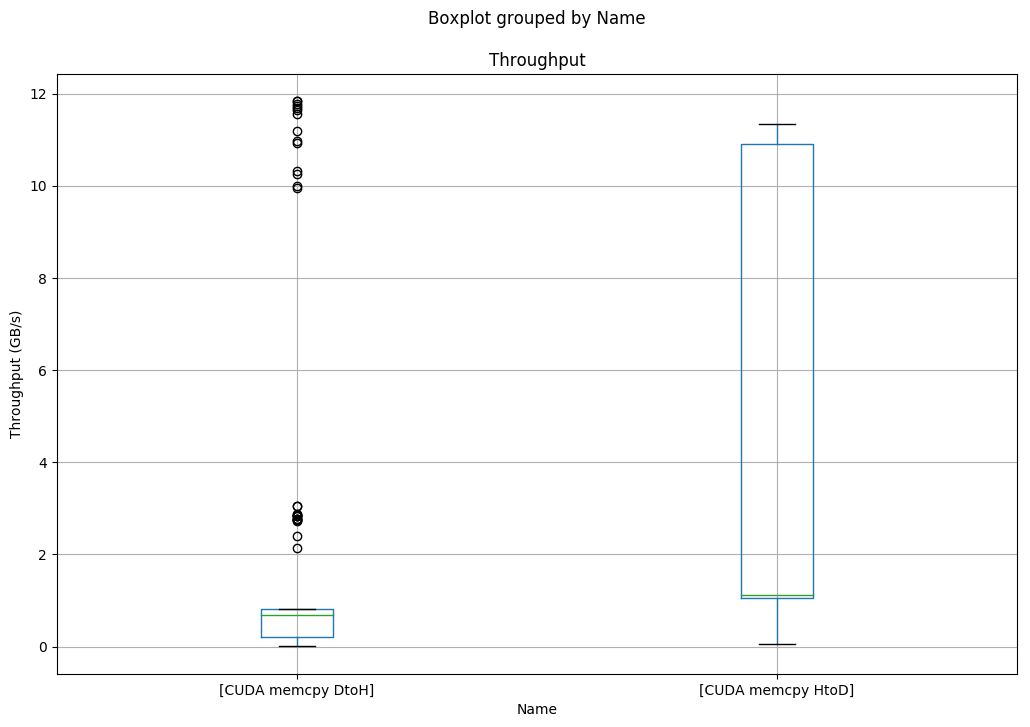

In [516]:
plt.rcParams['figure.figsize'] = 12,8
df_nomemset.boxplot(column="Throughput",by="Name")
ax = plt.gca()
ax.set_ylabel('Throughput (GB/s)')

In [392]:
print df_nvprof.columns
df_nvprof.iloc[90:95]

Index([u'Start', u'Duration', u'Size', u'Throughput', u'SrcMemType',
       u'DstMemType', u'Context', u'Stream', u'Name'],
      dtype='object')


,Start,Duration,Size,Throughput,SrcMemType,DstMemType,Context,Stream,Name
300,2.047135,0.002592,0.001099,0.413921,Device,NaN,1,7,[CUDA memset]
308,2.063540,0.003072,0.001099,0.349246,Device,NaN,1,7,[CUDA memset]
316,2.079898,0.002368,0.001099,0.453076,Device,NaN,1,7,[CUDA memset]
324,2.123529,0.002816,0.000549,0.190498,Device,NaN,1,7,[CUDA memset]
335,2.172092,0.001984,0.000549,0.270384,Device,NaN,1,7,[CUDA memset]


In [394]:
df_nvprof['FullName']  = df_nvprof.loc[:,'Name'] + " " + df_nvprof.loc[:,'SrcMemType']+ df_nvprof.loc[:,'DstMemType'].fillna("")

In [395]:
df_nvprof[pd.isnull(df_nvprof["FullName"])]

,Start,Duration,Size,Throughput,SrcMemType,DstMemType,Context,Stream,Name,FullName


In [396]:
# Convert unique values in column "FullName" to new columns
def mergeColumnNames(df_org):
    df = df_org.pivot(index="Start", columns="FullName", values = 'Throughput')
    df = df.fillna(0)  # Fill empty cells with 0-s
    return df

In [397]:
df_throughput = mergeColumnNames(df_nvprof)

In [398]:
df_throughput.iloc[:3]

FullName,[CUDA memcpy DtoH] DevicePageable,[CUDA memcpy HtoD] PageableDevice,[CUDA memcpy HtoD] PinnedDevice,[CUDA memset] Device
Start,,,,
0.298472,0.0,0.0,0.977125,0.0
0.298653,0.0,0.0,1.354651,0.0
0.298777,0.0,0.0,1.354651,0.0


In [399]:
df_memcpy = df_throughput.filter(regex=("^((?!memset).)*$"))
df_memcpy.iloc[:3]

FullName,[CUDA memcpy DtoH] DevicePageable,[CUDA memcpy HtoD] PageableDevice,[CUDA memcpy HtoD] PinnedDevice
Start,,,
0.298472,0.0,0.0,0.977125
0.298653,0.0,0.0,1.354651
0.298777,0.0,0.0,1.354651


In [400]:
def appendMaxValues2ColumnNames(df,series):
    cols = len(df.columns)
    col_names = []
    for i in range(0,cols):
        name = df.columns[i].replace("[CUDA memcpy ","")
        name = name.replace("]","")
        col_names.append(series+name+" " +'{:.3f}'.format(df.iloc[:,i].max()))
    df.columns = col_names
    return df

In [402]:
df_memcpy = appendMaxValues2ColumnNames(df_memcpy,"")

In [403]:
plt.rcParams['figure.figsize'] = 12,8

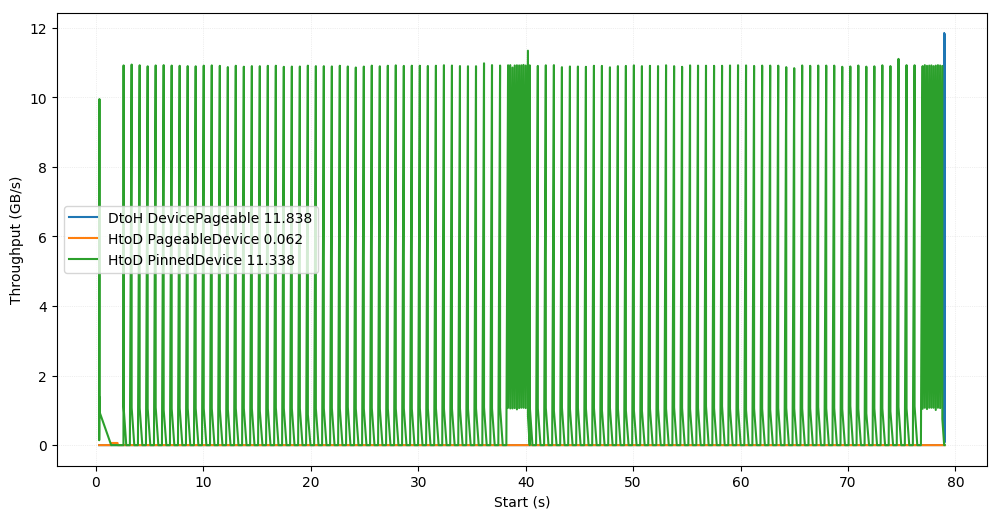

In [404]:
df_memcpy.plot()
ax = plt.gca()
ax.xaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
ax.yaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
#ax.xaxis.set_major_locator(plt.MaxNLocator(24))
ax.set_xlabel('Start (s)')
ax.set_ylabel('Throughput (GB/s)')
plt.show()

In [314]:
# PCI express x3 bandwidth
PCI3_band = 16 # GB/s

#### Normalize H<->D throughput

In [315]:
norm = df_memcpy.copy()
print type(df_memcpy),df_memcpy[:1].shape
print type(norm),norm[:1].shape


<class 'pandas.core.frame.DataFrame'> (86, 3)
<class 'pandas.core.frame.DataFrame'> (86, 3)


In [316]:
def normalize(x,max = 16):
    #print "max=",max 
    if isinstance(x,int) or isinstance(x,float):
        if x == 0:
            return 0
        else:
            x_ = float(x)
            max_ = float(max)
            norm = (x_/max_)*100
            #print x_,norm
            return norm
    elif x is None:
        return x
    else:
        print "Wrong parameter type:",type(x)

def normalize_df(x,max = 16):
    #print type(x)
    if isinstance(x,int) or isinstance(x,float):
        return normalize(x,max)
    else:
        #print x.values
        x = x.apply(normalize,max=max)
        #print "Returned:",type(x)
        #print x.values
        return x
    
       
norm.iloc[:,1:3] = norm.iloc[:,1:3].apply(normalize_df, max = 16)
norm.iloc[:3]

,DtoH DevicePageable 11.838,HtoD PageableDevice 0.062,HtoD PinnedDevice 11.338
Start,,,
0.298472,0.0,0.0,6.107031
0.298653,0.0,0.0,8.466569
0.298777,0.0,0.0,8.466569


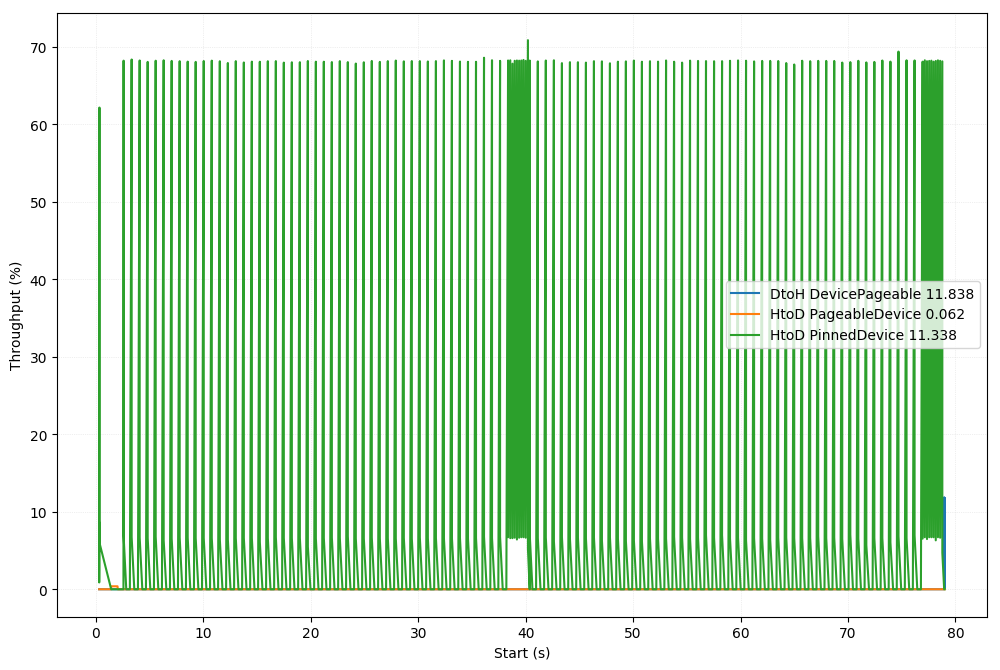

In [517]:
plt.rcParams['figure.figsize'] = 12,8
norm.plot()
ax = plt.gca()
ax.xaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
ax.yaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
#ax.xaxis.set_major_locator(plt.MaxNLocator(24))
ax.set_xlabel('Start (s)')
ax.set_ylabel('Throughput (%)')
plt.show()

#### M60 Device memory theoretical bandwidth

In [104]:
# Memory clock rate
GHz=5
# Interface width
bit=256

GBs=(GHz * 1e9 * (bit/8)) / 1e9
print GBs

160.0


In [2]:
# K80
# Memory clock rate
GHz=5
# Interface width
bit=384

GBs=(GHz * 1e9 * (bit/8)) / 1e9
print GBs

240.0


## Plot smi data

In [505]:
filename = filename_nvsmi_chainer
print "Reading",filename

smi_data = pd.read_csv(filename)
smi_data.iloc[:3]

Reading nvidia-smi-cifar_M60_combined.csv


,timestamp,name,memory.total [MiB],memory.used [MiB],utilization.gpu [%],utilization.memory [%]
0,2018/01/17 10:01:24.291,Tesla M60,7613 MiB,0 MiB,99 %,8 %
1,2018/01/17 10:01:24.392,Tesla M60,7613 MiB,0 MiB,84 %,7 %
2,2018/01/17 10:01:24.492,Tesla M60,7613 MiB,0 MiB,0 %,0 %


In [506]:
# Parse date from readable format to seconds
def parseTime(date_time):
    global start
    dt_obj = datetime.datetime.strptime(date_time, "%Y/%m/%d %H:%M:%S.%f")
    seconds = 0
    if start == 0:
        start = dt_obj
    else:
        seconds = (dt_obj - start).total_seconds()
    return seconds

In [507]:
smi_data["sec"] = smi_data["timestamp"].apply(parseTime)
smi_data.iloc[:3]

,timestamp,name,memory.total [MiB],memory.used [MiB],utilization.gpu [%],utilization.memory [%],sec
0,2018/01/17 10:01:24.291,Tesla M60,7613 MiB,0 MiB,99 %,8 %,0.000
1,2018/01/17 10:01:24.392,Tesla M60,7613 MiB,0 MiB,84 %,7 %,0.101
2,2018/01/17 10:01:24.492,Tesla M60,7613 MiB,0 MiB,0 %,0 %,0.201


In [508]:
smi_data.set_index("sec", drop=True, inplace=True)
smi_data.iloc[:3]

,timestamp,name,memory.total [MiB],memory.used [MiB],utilization.gpu [%],utilization.memory [%]
sec,,,,,,
0.000,2018/01/17 10:01:24.291,Tesla M60,7613 MiB,0 MiB,99 %,8 %
0.101,2018/01/17 10:01:24.392,Tesla M60,7613 MiB,0 MiB,84 %,7 %
0.201,2018/01/17 10:01:24.492,Tesla M60,7613 MiB,0 MiB,0 %,0 %


In [509]:
smi_data = smi_data.drop(columns = ['timestamp', ' name'])

In [510]:
pat = re.compile("[0-9\.]+")
# Extract float number from a string
def parseFloat(str):
    global pat
    f = pat.search(str)
    if f is not None:
        d = float(f.group())
        return d
    return None

In [511]:
smi_data = smi_data.applymap(parseFloat)
smi_data.iloc[:3]

,memory.total [MiB],memory.used [MiB],utilization.gpu [%],utilization.memory [%]
sec,,,,
0.000,7613.0,0.0,99.0,8.0
0.101,7613.0,0.0,84.0,7.0
0.201,7613.0,0.0,0.0,0.0


In [512]:
smi_MB = smi_data.filter(regex=(".*\[MiB.*"))
smi_pr = smi_data.filter(regex=(".*\[\%.*"))
smi_pr.iloc[500:503]

,utilization.gpu [%],utilization.memory [%]
sec,,
50.154,100.0,61.0
50.254,100.0,61.0
50.354,100.0,79.0


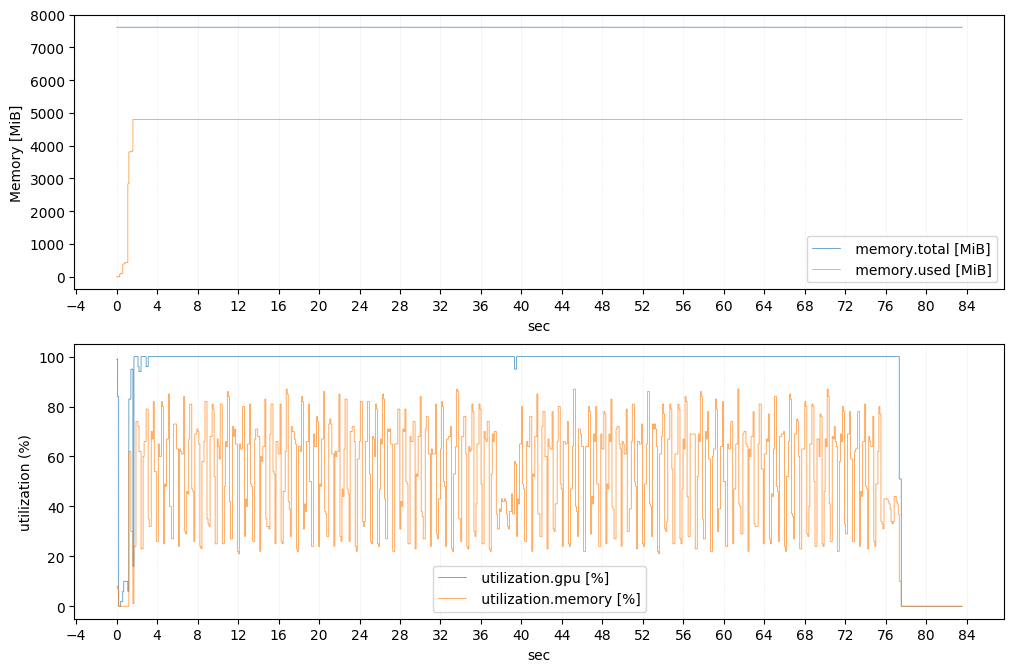

In [514]:
plt.rcParams['figure.figsize'] = 12,8
fig, axarr = plt.subplots(2)
smi_MB.plot(drawstyle="steps-post",linewidth=0.5,alpha=0.9,ax = axarr[0])
smi_pr.plot(drawstyle="steps-post",linewidth=0.5,alpha=0.9,ax = axarr[1])
axarr[0].set_ylabel('Memory [MiB]')
axarr[1].set_ylabel('utilization (%)')
for axis in axarr:
    axis.legend()
    axis.xaxis.grid(color="#e0e0e0", linestyle=":",linewidth=0.5)
    axis.xaxis.set_major_locator(plt.MaxNLocator(24))
    #axis.xaxis.set_major_locator(dates.SecondLocator(bysecond = range(120), interval = 10))
    #axis.xaxis.set_minor_locator(dates.MicrosecondLocator(interval = 1000))
    #axis.xaxis.set_major_formatter(dates.DateFormatter('%S:%f'))
plt.show()